In [1]:
import sys
import time

import numpy as np
import matplotlib.pyplot as plt

import probability_functions as p
from plotting_tools import plot_probabilities

In [2]:
full_matrix = True
one_per_time = True

In [3]:
experiment_params={
    "n_dimensions": 2,
    "n_constraints": 5,
    "n_repetitions": 500, # do 5000 for smooth results
    "full_matrix": full_matrix,
    "n_anchors_list": [3, 4, 6, 20], # calcualte different number of anchors in a loop
    "n_times": 40 if one_per_time else 15, # reduce number of times if many measurements per time are available
    "one_per_time": one_per_time,
}

start = time.time()
ranks, params = p.matrix_rank_experiment(**experiment_params)
end = time.time()
print("elapsed time: {:.2f}s".format(end - start))

estimated_probabilities = np.mean(ranks >= params["max_rank"], axis=2)
estimated_variance = np.var(ranks >= params["max_rank"], axis=2)

elapsed time: 20.40s


In [4]:
probabilities = []

start = time.time()
for idx, n_anchors in enumerate(params["n_anchors_list"]):
    print("{} anchors".format(n_anchors))
    probabilities.append([p.probability_upper_bound(
        params["n_dimensions"],
        params["n_constraints"],
        n_measurements=n,
        position_wise=False,
        n_anchors=n_anchors,
        n_times=np.Infinity if one_per_time else params["n_times"],
        full_matrix=params["full_matrix"]
    ) for n in params["n_measurements_list"]])
probabilities = np.array(probabilities)
print("time: {:.2f}s".format(time.time()-start))

3 anchors
4 anchors
6 anchors
20 anchors
Upper bound, position 33, measurements False, elapsed time: 1.09s
Upper bound, position 34, measurements False, elapsed time: 1.34s
Upper bound, position 35, measurements False, elapsed time: 1.80s
Upper bound, position 36, measurements False, elapsed time: 2.13s
Upper bound, position 37, measurements False, elapsed time: 2.13s
Upper bound, position 38, measurements False, elapsed time: 2.56s
Upper bound, position 39, measurements False, elapsed time: 3.06s
Upper bound, position 40, measurements False, elapsed time: 3.69s
time: 26.02s


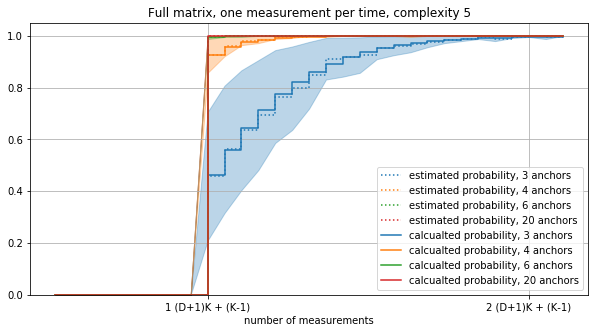

In [5]:
f, ax = plt.subplots(figsize=(10, 5))
plot_probabilities(estimated_probabilities, params, ax, linestyle=":", variance=estimated_variance)
plot_probabilities(probabilities.T, params, ax, label="calcualted")
matrix_name = "Full matrix" if params["full_matrix"] else "Left hand side"
measurements_type = "one measurement per time" if params["one_per_time"] else "many measurements per time"
ax.set_title("{}, {}, complexity {}".format(matrix_name, measurements_type, params["n_constraints"]))
plt.show()